In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

### Data Prep

In [2]:
df = pd.read_csv('news_data.csv')
df.head()

,LABEL,according,agency,ahead,alabama,amazon,america,american,announced,appeared,...,wolverines,women,work,working,world,wrote,year,years,york,young
0,politics,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df['LABEL'].unique()

array(['politics', 'football', 'science'], dtype=object)

In [4]:
label_map = {'politics': 0, 'football': 1, 'science': 2}

In [5]:
df['LABEL'] = df['LABEL'].map(label_map)

In [6]:
df.head()

,LABEL,according,agency,ahead,alabama,amazon,america,american,announced,appeared,...,wolverines,women,work,working,world,wrote,year,years,york,young
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y = df['LABEL']
X = df.drop(['LABEL'], axis=1)

In [8]:
print(f'y.shape: {y.shape} \n')
print(f'X.shape: {X.shape}')

y.shape: (1493,) 

X.shape: (1493, 300)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [10]:
print(f'y_train.shape: {y_train.shape} \n')
print(f'x_train.shape: {x_train.shape} \n')
print(f'y_test.shape: {y_test.shape} \n')
print(f'x_test.shape: {x_test.shape}')

y_train.shape: (1194,) 

x_train.shape: (1194, 300) 

y_test.shape: (299,) 

x_test.shape: (299, 300)


In [11]:
enc = OneHotEncoder()
y_train_enc = enc.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test_enc = enc.fit_transform(y_test.values.reshape(-1, 1)).toarray()

In [12]:
print(f'y_train before encoding: \n {y_train[0:5].tolist()}')
print(f'y_train encoded: \n {y_train_enc[0:5].tolist()}')

y_train before encoding: 
 [1, 2, 2, 0, 2]
y_train encoded: 
 [[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0]]


### ANN

In [13]:
ann = tf.keras.models.Sequential([
    tf.keras.Input(shape=(300,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [14]:
ann.compile(
    loss="categorical_crossentropy",
    metrics=["accuracy"],
    optimizer='adam'
)

In [15]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,979 (183.51 KB)

 Trainable params: 46,979 (183.51 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
hist = ann.fit(x_train, y_train_enc, epochs=5, validation_data=(x_test, y_test_enc))

Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5193 - loss: 1.0074 - val_accuracy: 0.6856 - val_loss: 0.9079
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7018 - loss: 0.7962 - val_accuracy: 0.7492 - val_loss: 0.7108
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7722 - loss: 0.5859 - val_accuracy: 0.7492 - val_loss: 0.6038
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8275 - loss: 0.4562 - val_accuracy: 0.7492 - val_loss: 0.6027
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8509 - loss: 0.3753 - val_accuracy: 0.7559 - val_loss: 0.6174


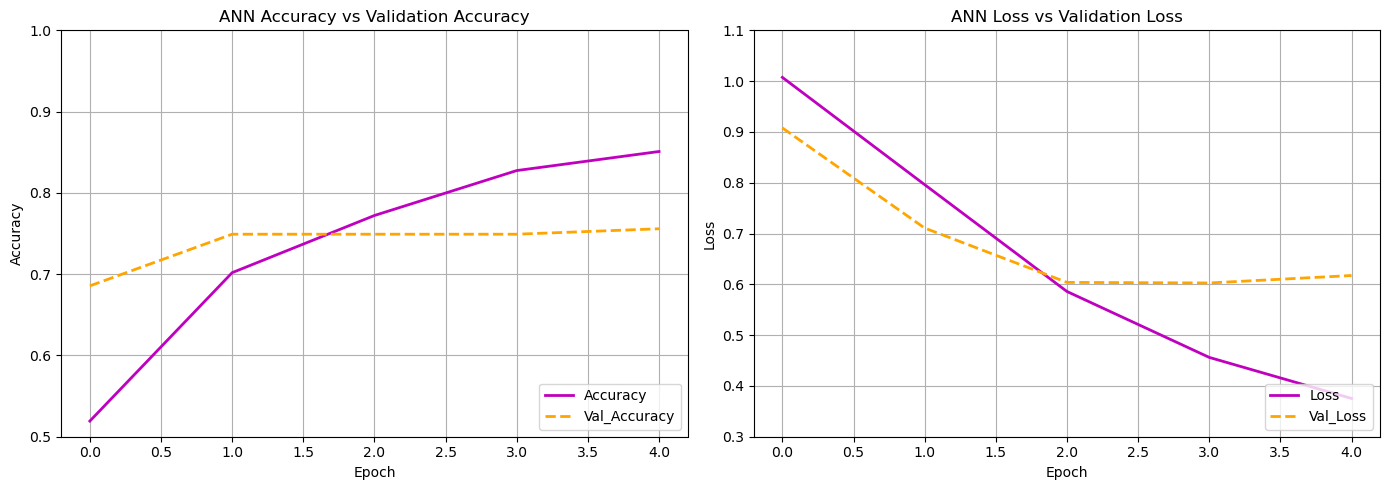

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(hist.history['accuracy'], label='Accuracy', c='m', linewidth=2, linestyle='-')
axes[0].plot(hist.history['val_accuracy'], label = 'Val_Accuracy', c='orange', linewidth=2, linestyle='--')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0.5, 1.0)
axes[0].set_title('ANN Accuracy vs Validation Accuracy')
axes[0].grid()
axes[0].legend(loc='lower right')

axes[1].plot(hist.history['loss'], label='Loss', c='m', linewidth=2, linestyle='-')
axes[1].plot(hist.history['val_loss'], label = 'Val_Loss', c='orange', linewidth=2, linestyle='--')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_ylim(0.3, 1.1)
axes[1].set_title('ANN Loss vs Validation Loss')
axes[1].grid()
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

In [18]:
test_loss, test_accuracy = ann.evaluate(x_test, y_test_enc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7559 - loss: 0.6174 


In [19]:
predictions = ann.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


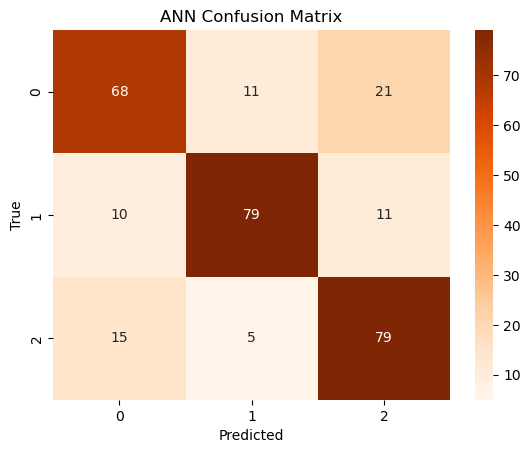

In [20]:
int_predictions = predictions.argmax(axis=1)
y_test_int = np.argmax(y_test_enc, axis=1)

labels = [0, 1, 2]
cm = confusion_matrix(y_test_int, int_predictions, labels = labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('ANN Confusion Matrix')
plt.show()

### CNN

In [21]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim = 301, output_dim = 50), # output_dim = embedding
    tf.keras.layers.Conv1D(256, 20, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [22]:
cnn.compile(
    loss="categorical_crossentropy",
    metrics=["accuracy"],
    optimizer='adam'
)

In [23]:
hist = cnn.fit(x_train, y_train_enc, epochs=5, validation_data=(x_test, y_test_enc))

Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.3174 - loss: 1.1005 - val_accuracy: 0.3344 - val_loss: 1.0986
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3350 - loss: 1.0987 - val_accuracy: 0.3344 - val_loss: 1.0986
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3350 - loss: 1.0987 - val_accuracy: 0.3344 - val_loss: 1.0986
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3350 - loss: 1.0986 - val_accuracy: 0.3344 - val_loss: 1.0986
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.3350 - loss: 1.0987 - val_accuracy: 0.3344 - val_loss: 1.0986


In [24]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 300, 50)        │        15,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 281, 256)       │       256,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 256)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 821,729 (3.13 MB)

 Trainable params: 273,909 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 547,820 (2.09 MB)

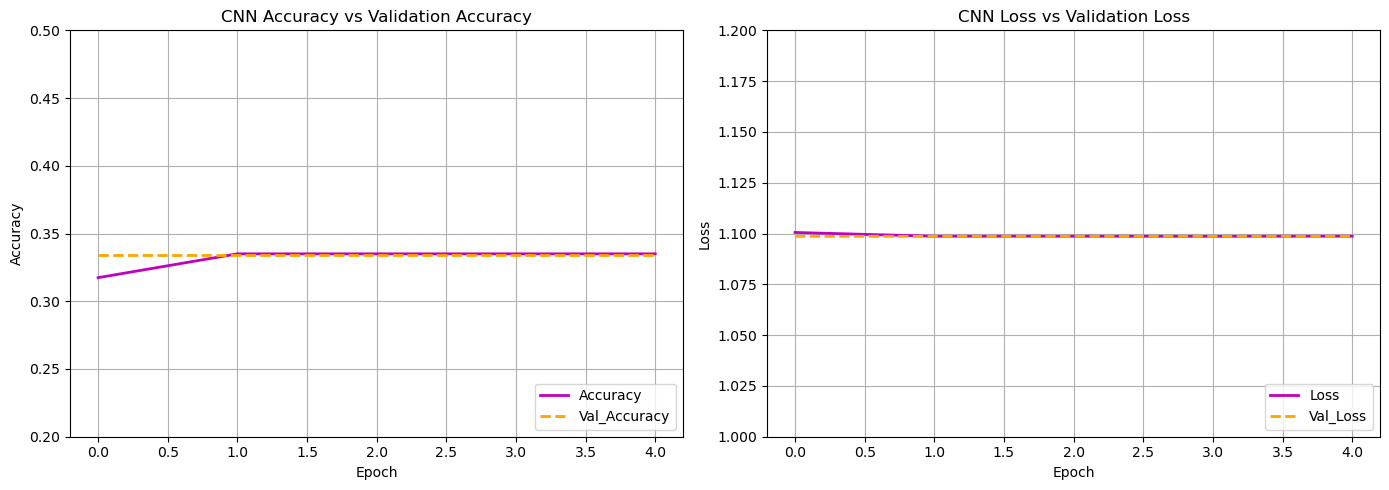

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(hist.history['accuracy'], label='Accuracy', c='m', linewidth=2, linestyle='-')
axes[0].plot(hist.history['val_accuracy'], label='Val_Accuracy', c='orange', linewidth=2, linestyle='--')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0.2, 0.5)
axes[0].grid(True)
axes[0].set_title('CNN Accuracy vs Validation Accuracy')
axes[0].legend(loc='lower right')

axes[1].plot(hist.history['loss'], label='Loss', c='m', linewidth=2, linestyle='-')
axes[1].plot(hist.history['val_loss'], label='Val_Loss', c='orange', linewidth=2, linestyle='--')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_ylim(1.0, 1.2)
axes[1].grid(True)
axes[1].set_title('CNN Loss vs Validation Loss')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

In [26]:
test_loss, test_accuracy = cnn.evaluate(x_test, y_test_enc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3344 - loss: 1.0986


In [27]:
predictions = cnn.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


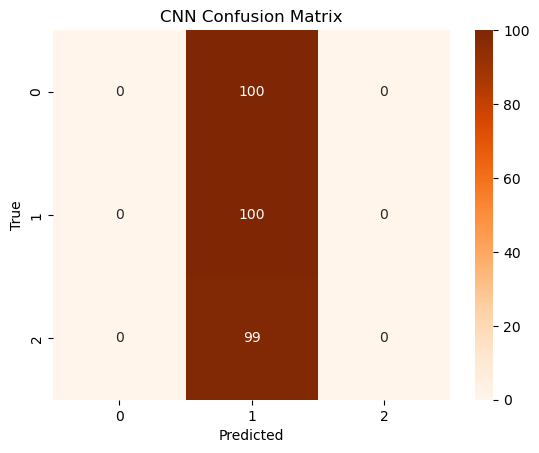

In [28]:
int_predictions = predictions.argmax(axis=1)
y_test_int = np.argmax(y_test_enc, axis=1)

labels = [0, 1, 2]
cm = confusion_matrix(y_test_int, int_predictions, labels = labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN Confusion Matrix')
plt.show()

### LSTM

In [29]:
lstm = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim = 301, output_dim = 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [30]:
lstm.compile(
    loss="categorical_crossentropy",
    metrics=["accuracy"],
    optimizer='adam'
)

In [31]:
hist = lstm.fit(x_train, y_train_enc, epochs=5, validation_data=(x_test, y_test_enc))

Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.3375 - loss: 1.1010 - val_accuracy: 0.3311 - val_loss: 1.0992
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3342 - loss: 1.1002 - val_accuracy: 0.3278 - val_loss: 1.0985
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.3476 - loss: 1.0985 - val_accuracy: 0.3880 - val_loss: 1.0981
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.3752 - loss: 1.0973 - val_accuracy: 0.3478 - val_loss: 1.0962
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.3727 - loss: 1.0889 - val_accuracy: 0.3344 - val_loss: 1.1064


In [32]:
lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 300, 32)        │         9,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100)            │        33,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,407 (505.50 KB)

 Trainable params: 43,135 (168.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 86,272 (337.00 KB)

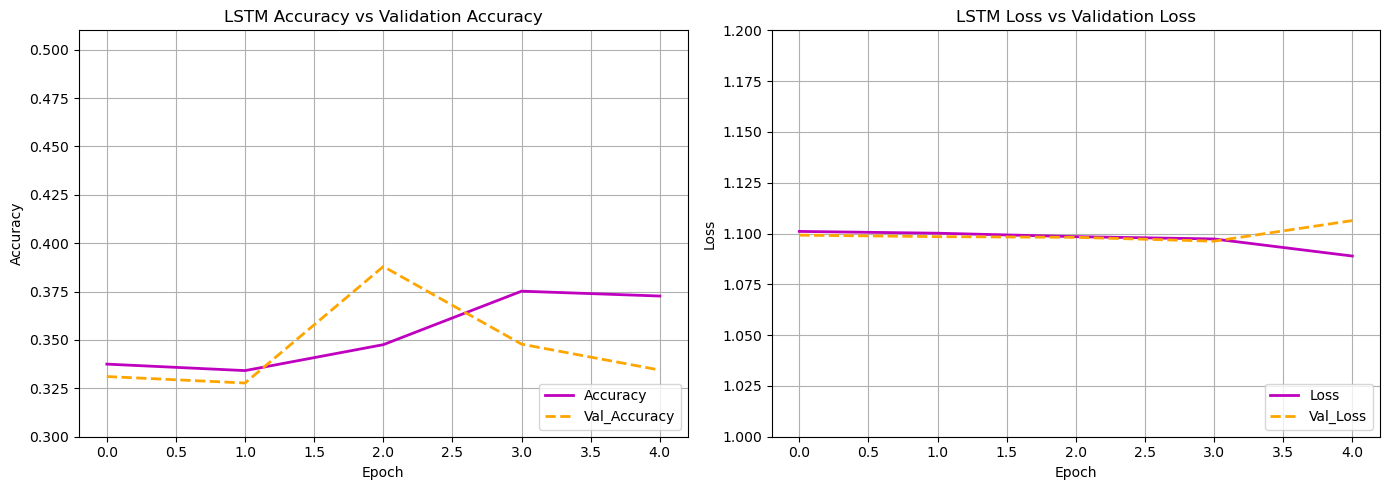

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(hist.history['accuracy'], label='Accuracy', c='m', linewidth=2, linestyle='-')
axes[0].plot(hist.history['val_accuracy'], label='Val_Accuracy', c='orange', linewidth=2, linestyle='--')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0.3, 0.51)
axes[0].grid(True)
axes[0].set_title('LSTM Accuracy vs Validation Accuracy')
axes[0].legend(loc='lower right')

axes[1].plot(hist.history['loss'], label='Loss', c='m', linewidth=2, linestyle='-')
axes[1].plot(hist.history['val_loss'], label='Val_Loss', c='orange', linewidth=2, linestyle='--')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_ylim(1.0, 1.2)
axes[1].grid(True)
axes[1].set_title('LSTM Loss vs Validation Loss')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

In [34]:
test_loss, test_accuracy = lstm.evaluate(x_test, y_test_enc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3344 - loss: 1.1064


In [35]:
predictions = lstm.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


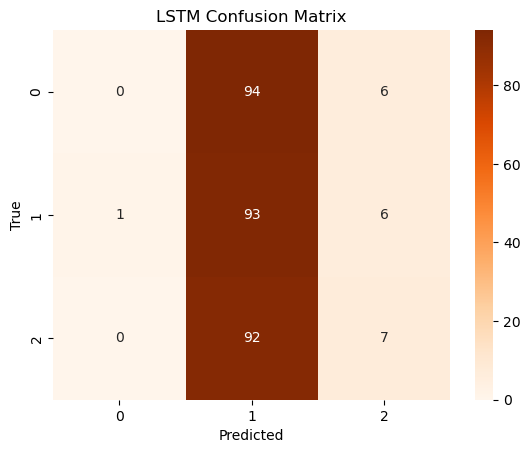

In [36]:
int_predictions = predictions.argmax(axis=1)
y_test_int = np.argmax(y_test_enc, axis=1)

labels = [0, 1, 2]
cm = confusion_matrix(y_test_int, int_predictions, labels = labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LSTM Confusion Matrix')
plt.show()